In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


%matplotlib inline

# 1. Загружаем данные из файла

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Описания файлов
* train.csv — обучающий набор
* test.csv — набор тестов
* sample_submission.csv — эталонное представление, полученное на основе линейной регрессии по году и месяцу продажи, площади участка и количеству спален.

# 2. Аннализ целевой переменной SalePrice

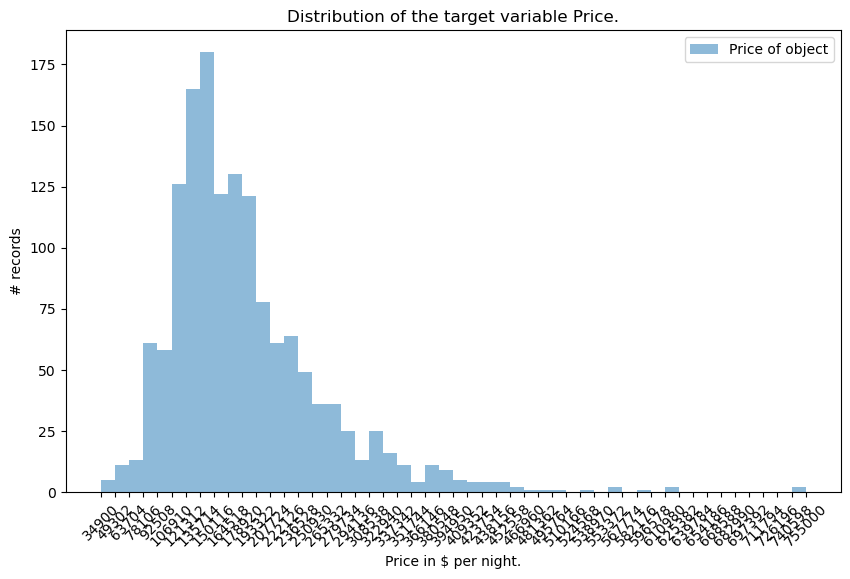

In [6]:
data = df_train['SalePrice']

fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data, label = 'Price of object', alpha = 0.5, bins = 50)

ax.set_title('Distribution of the target variable Price.')
ax.set_xlabel('Price in $ per night.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

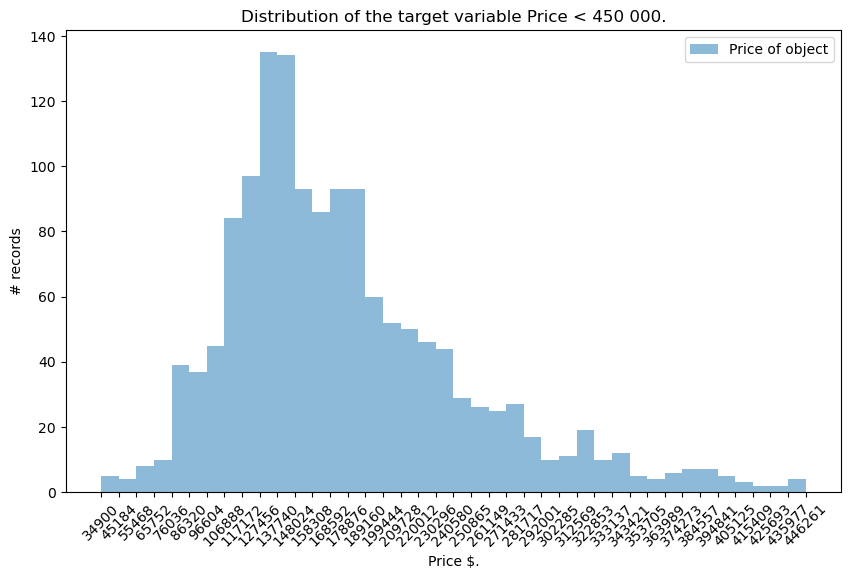

In [7]:
data = df_train[df_train['SalePrice'] < 450000]['SalePrice']

fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data, label = 'Price of object', alpha = 0.5, bins = 40)

ax.set_title('Distribution of the target variable Price < 450 000.')
ax.set_xlabel('Price $.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

# 3. Посмотрим на распределения остальных фичей

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
pd.set_option('display.max_rows', None)
df_train.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [10]:
df_train.shape

(1460, 81)

In [11]:
df_train = df_train.fillna(0)

In [12]:
df_train.isna().sum().sort_values(ascending = False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

# 4. Поиск зависимостей фичей и SalePrice

In [13]:
df_train_dtype = df_train.select_dtypes(['int64', 'float64'])

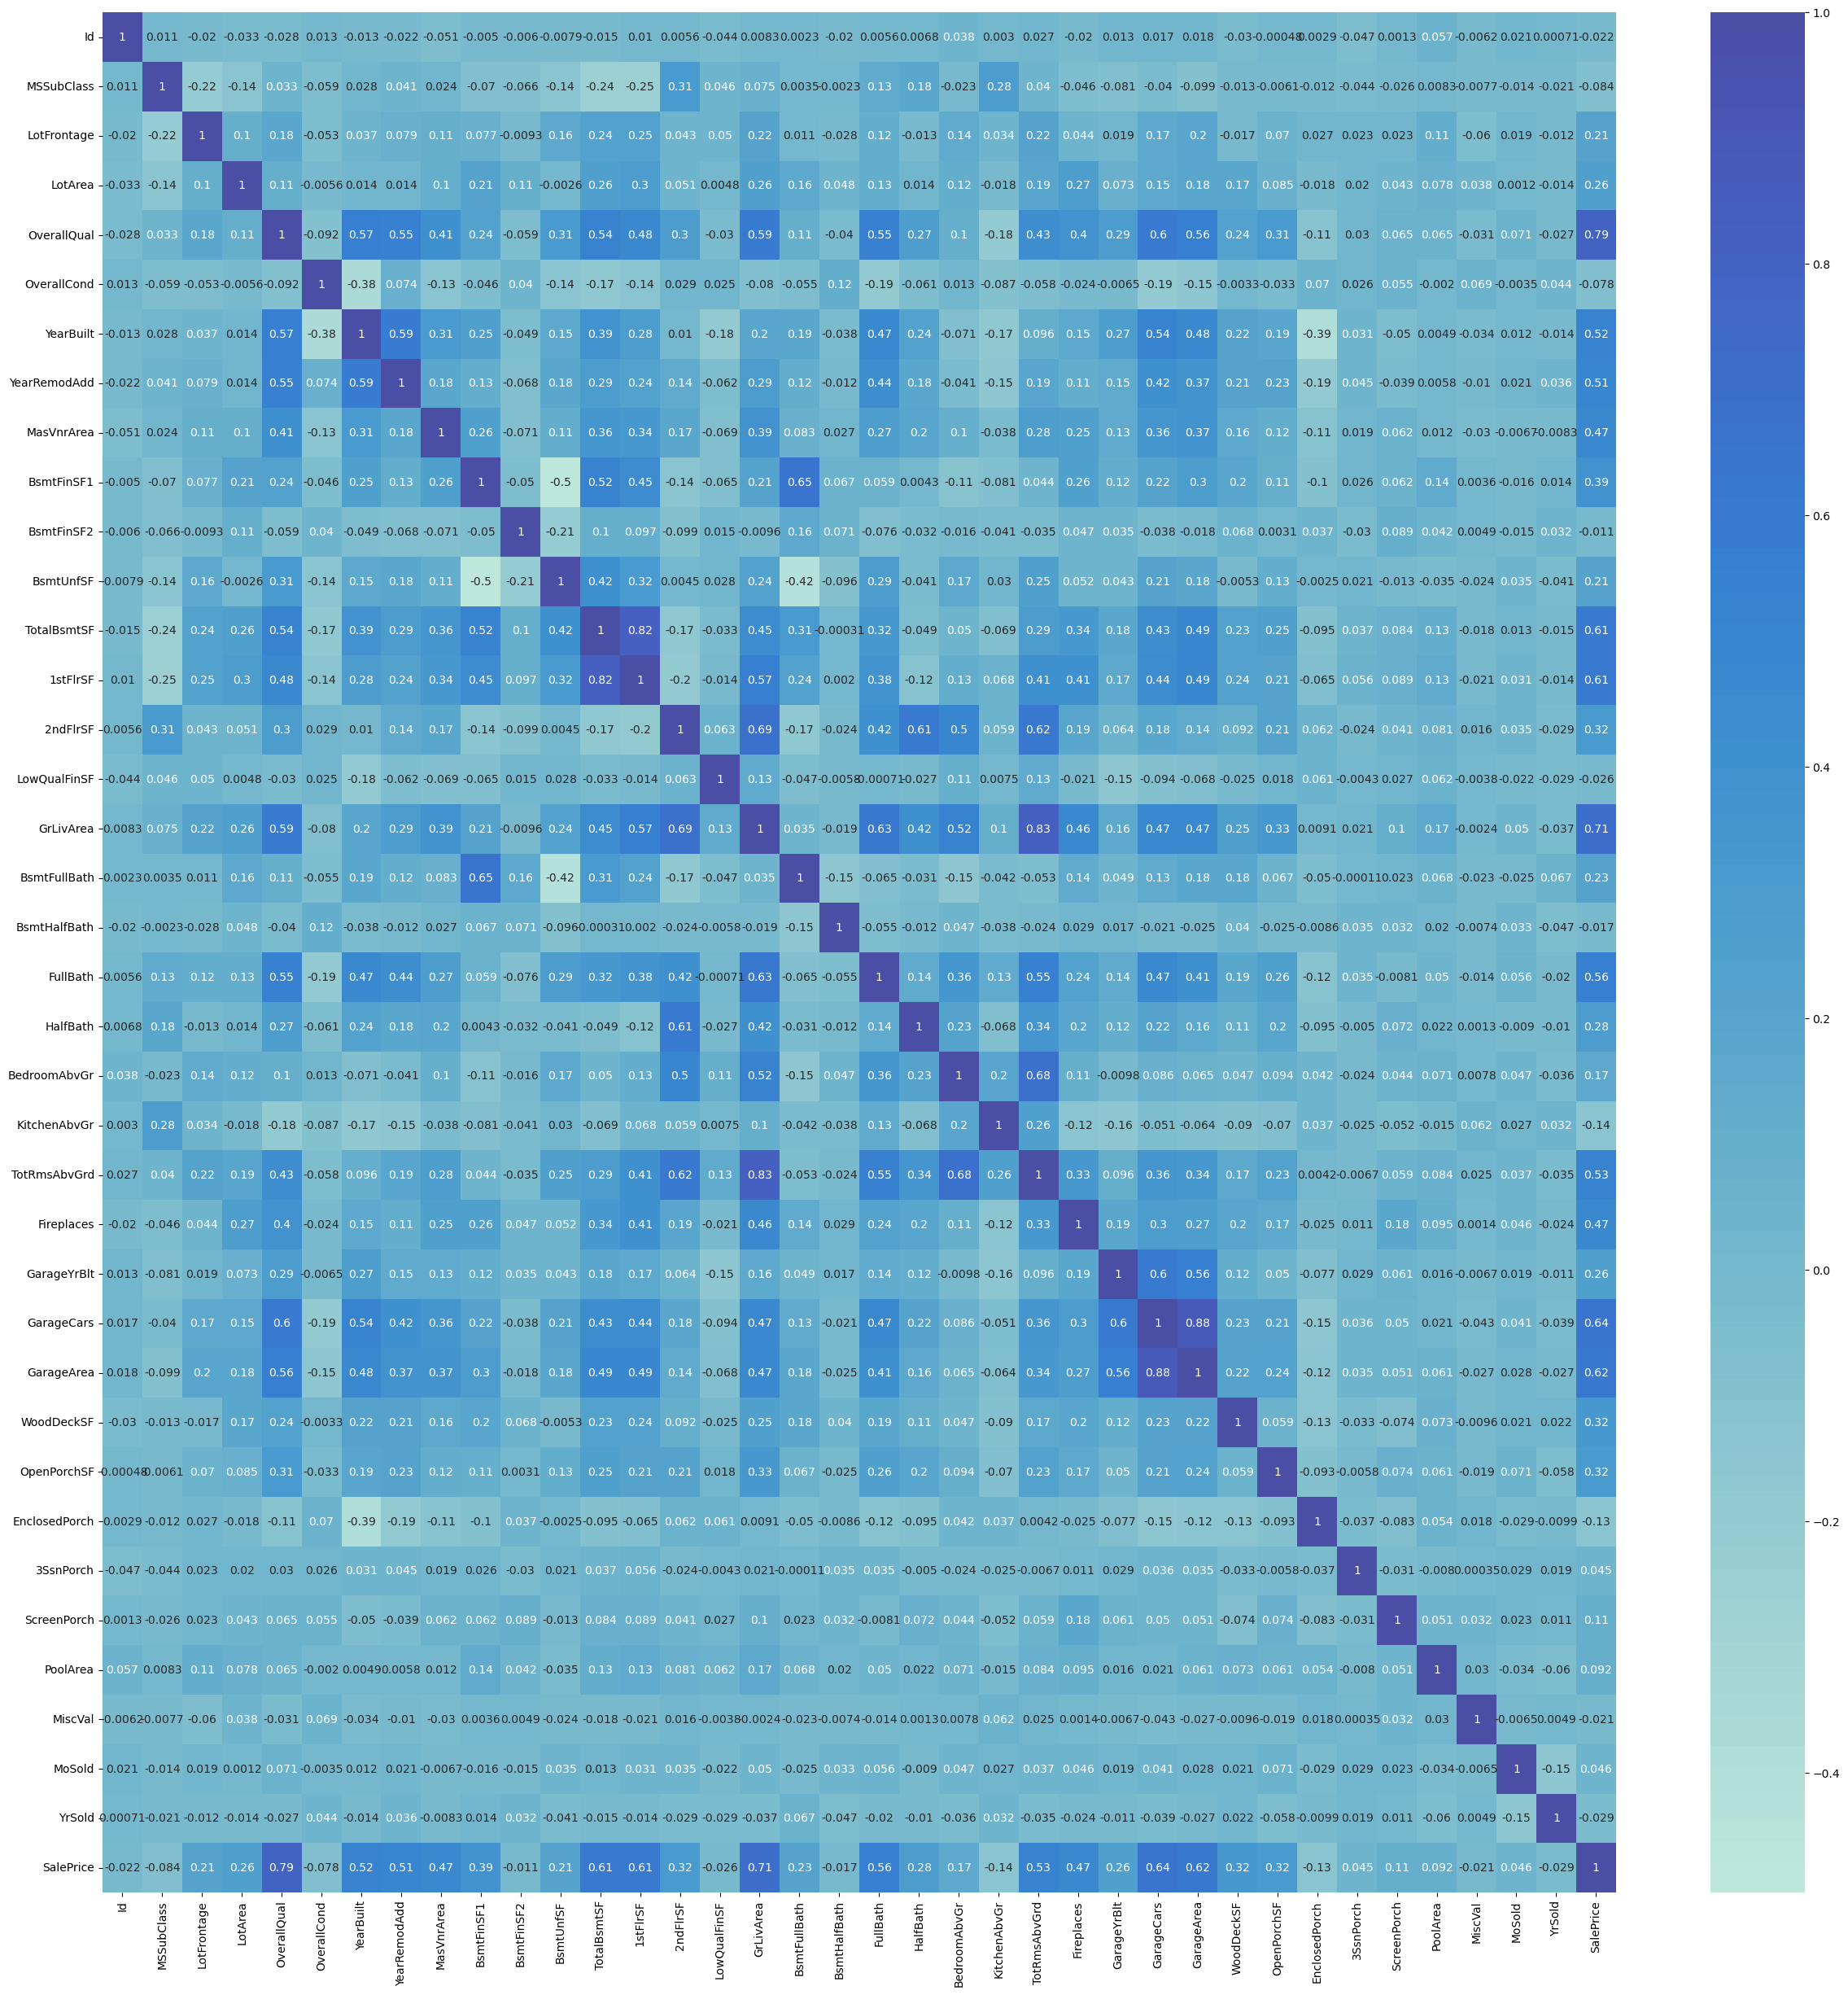

In [14]:
data_s = df_train_dtype.iloc[:,:].columns
corr_m = df_train_dtype[data_s].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_m, center=2, annot=True)
plt.show()

In [15]:
df_train_corr_m = pd.DataFrame(corr_m[corr_m['SalePrice']>0.6]['SalePrice'])
listOf_corr = df_train_corr_m.index
listOf_corr

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [16]:
train_df_corr = df_train_dtype[listOf_corr]
train_df_corr.head(3)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500


In [17]:
train_df_corr.iloc[:,-1].shape

(1460,)

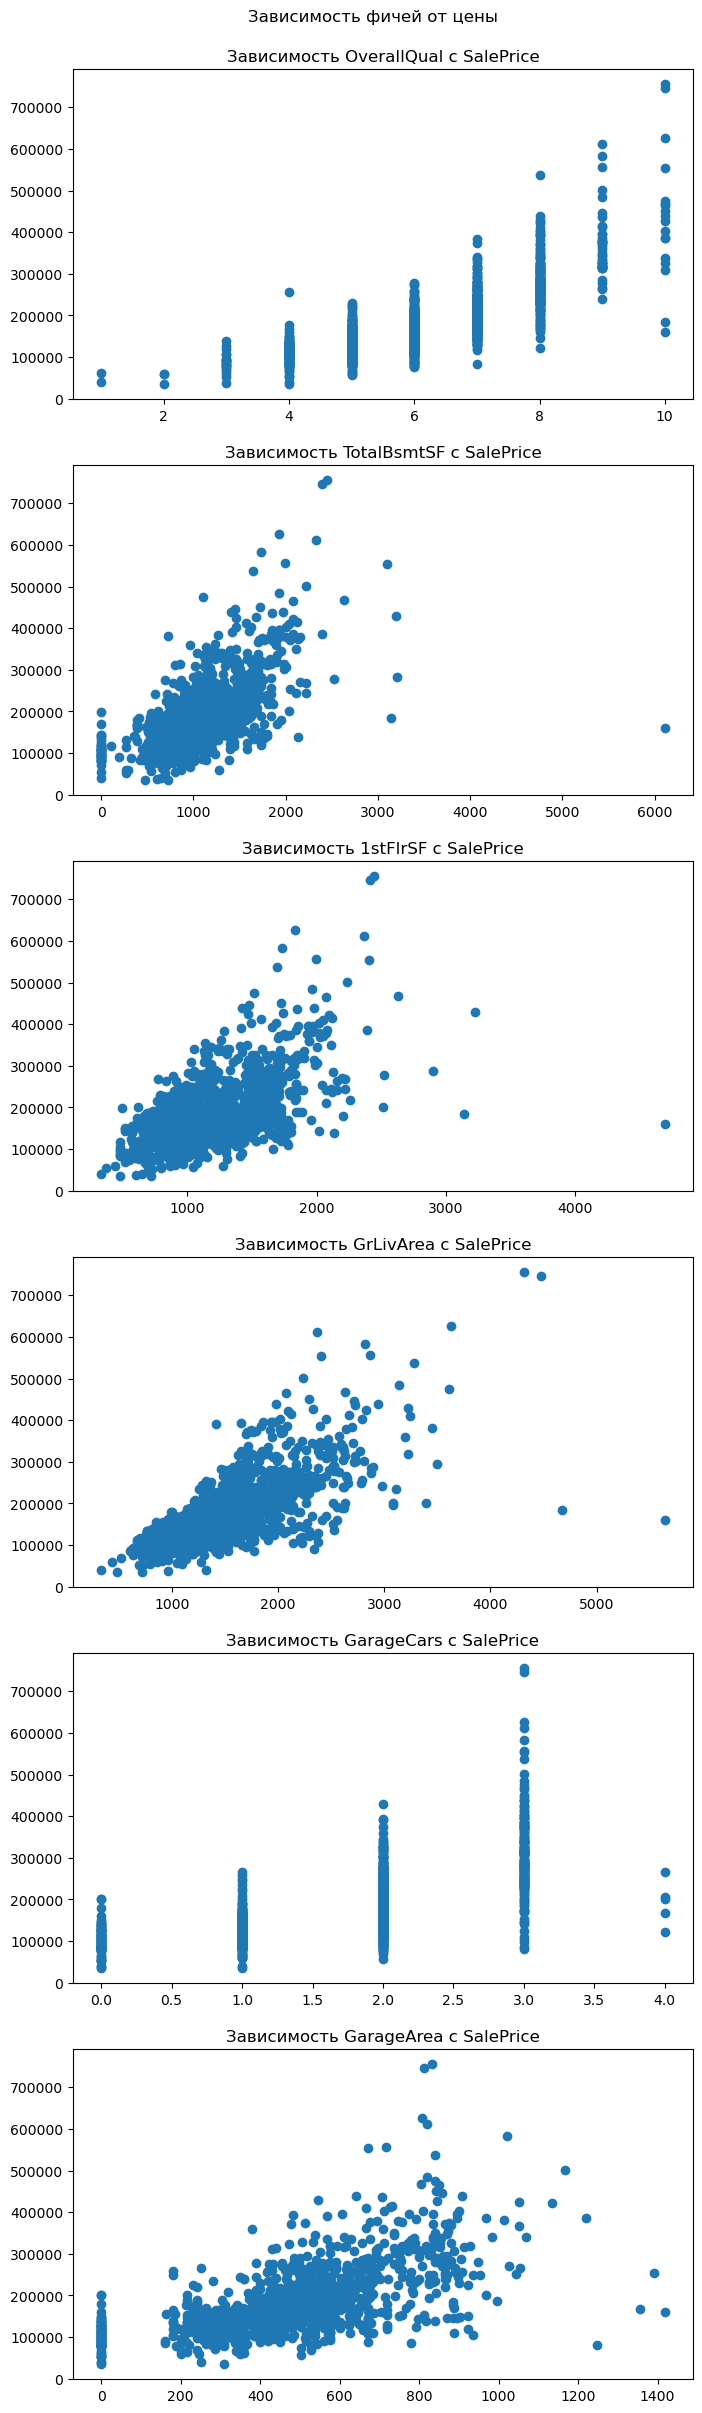

In [18]:
fig, axs = plt.subplots(nrows = 6, ncols = 1, sharey = True, figsize = (8,30)) # инициализируем график, сделаем общей ось У
#заведем два списка с издателми и жанрами  по которым мы будем итерировать
feature = train_df_corr.iloc[:,:-1].columns
main_feature = train_df_corr.iloc[:,-1]

for i, value in enumerate(feature):
    ax = axs[i]
    ax.scatter(train_df_corr[value], main_feature, label = str(value) + 'с SalePrice')
    ax.set_title('Зависимость ' + str(value) + ' c SalePrice')

fig.suptitle('Зависимость фичей от цены', y = 0.9)            
plt.show()

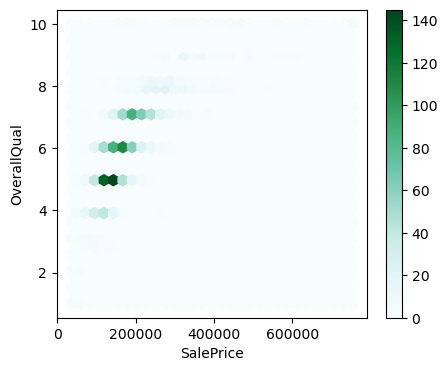

In [19]:
ax = train_df_corr.plot.hexbin(x='SalePrice', y='OverallQual', 
                               gridsize=30, sharex = False, figsize = (5,4))

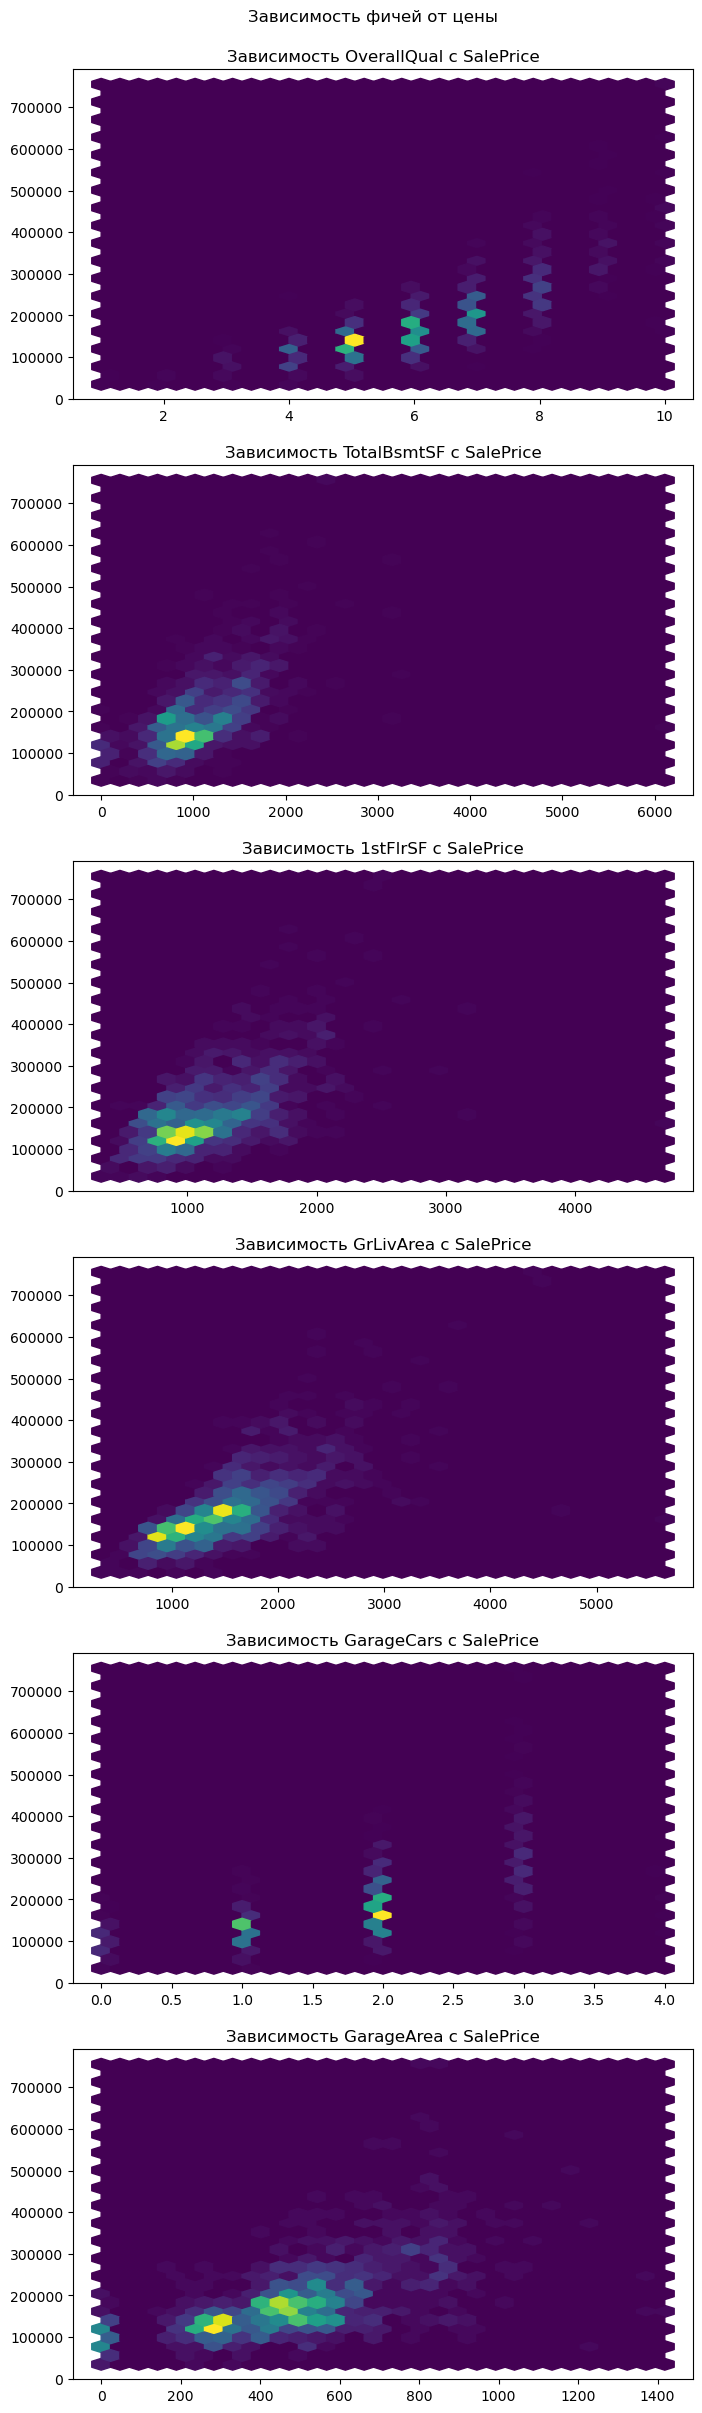

In [20]:
fig, axs = plt.subplots(nrows = 6, ncols = 1, sharey = True, figsize = (8,30)) # инициализируем график, сделаем общей ось У
#заведем два списка с издателми и жанрами  по которым мы будем итерировать
feature = train_df_corr.iloc[:,:-1].columns
main_feature = train_df_corr.iloc[:,-1]

for i, value in enumerate(feature):
    ax = axs[i]
    ax.hexbin(x=train_df_corr[value], y=main_feature, gridsize=30)
    ax.set_title('Зависимость ' + str(value) + ' c SalePrice')

fig.suptitle('Зависимость фичей от цены', y = 0.9)            
plt.show()

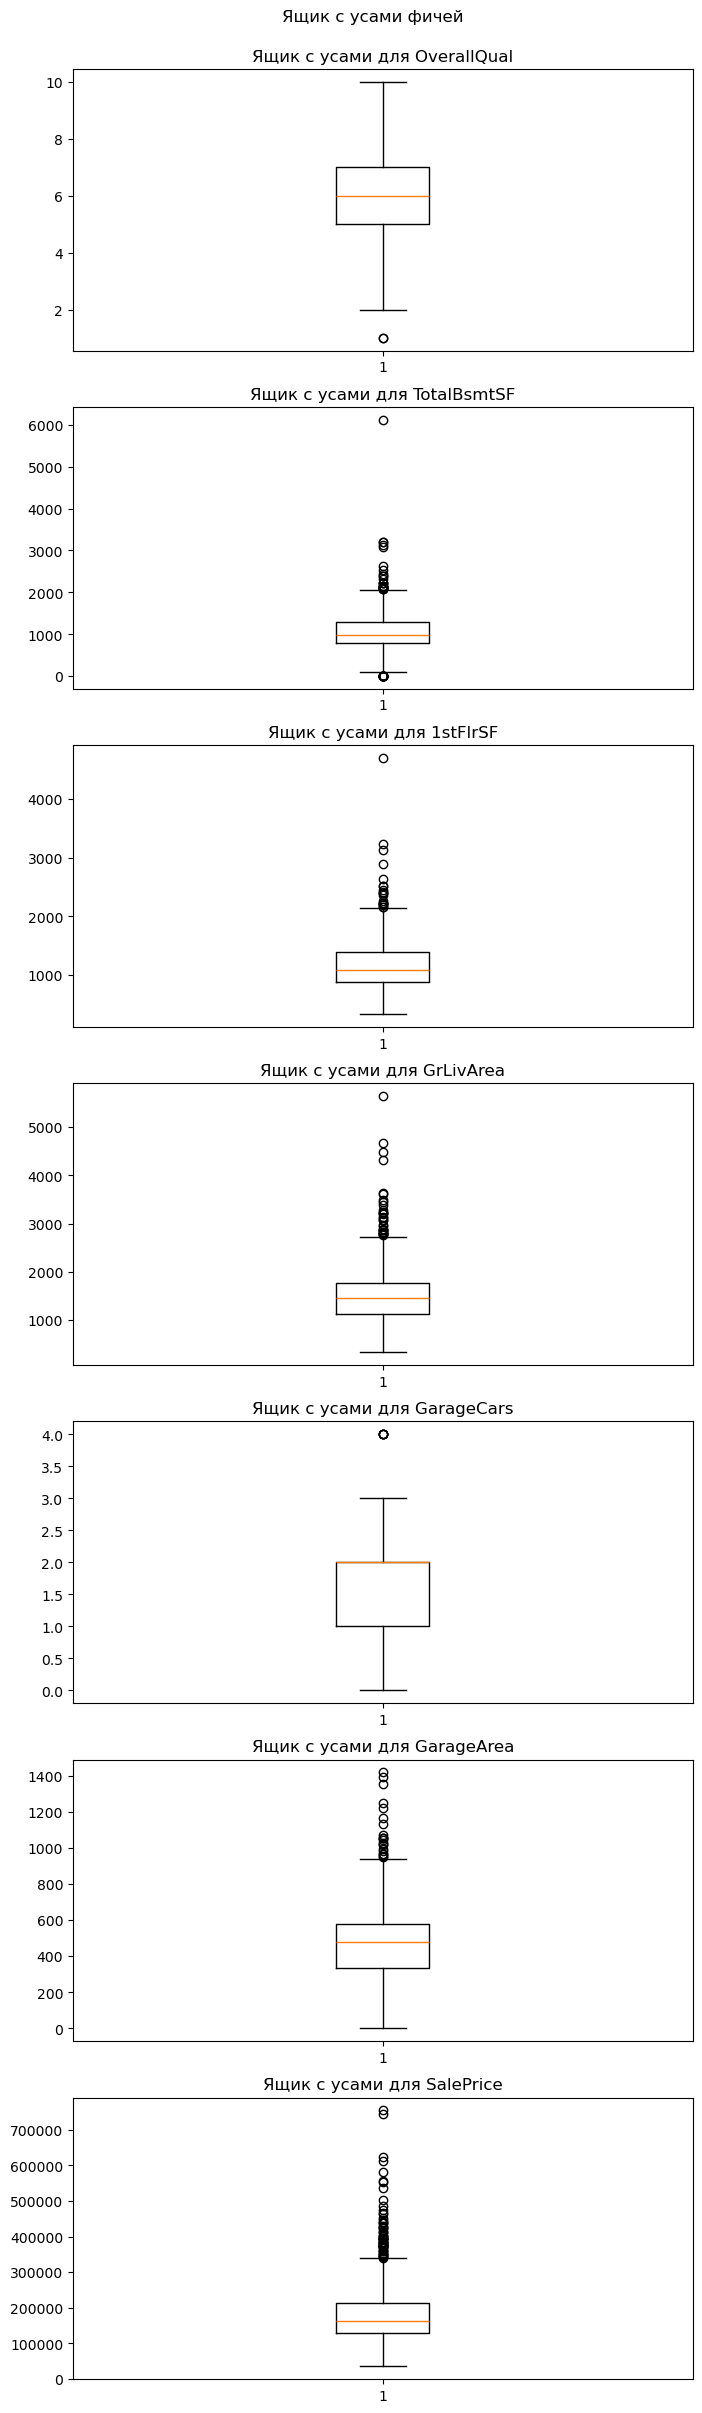

In [21]:
fig, ax = plt.subplots(nrows= 7, ncols= 1, figsize = (8, 30))

data_s = train_df_corr.columns

for i, feature in enumerate(data_s):
        data_S = train_df_corr[feature]
        ax[i].boxplot(data_S)
        ax[i].set_title('Ящик с усами для ' + feature, y = 1)
                        
fig.suptitle('Ящик с усами фичей', y = 0.9)
plt.subplots_adjust(hspace = 0.2)
plt.show()

# 5. Подготовка данных и их нормализация.

#### StandardScaler

In [22]:
x_scaler =  StandardScaler() #создать экземпляр класса scaler=StandardScaler()
stand_scaled_df = x_scaler.fit_transform(train_df_corr)
print(stand_scaled_df.shape)
stand_scaled_df = pd.DataFrame(stand_scaled_df)
stand_scaled_df.columns = train_df_corr.columns

(1460, 7)


#### min-max normalization

In [23]:
x_min_max_norm =  MinMaxScaler() #создать экземпляр класса scaler=StandardScaler()
min_max_df = x_min_max_norm.fit_transform(train_df_corr)
print(min_max_df.shape)
min_max_df = pd.DataFrame(min_max_df)
min_max_df.columns = train_df_corr.columns

(1460, 7)


#### логорифмирование

In [24]:
log_df = np.log1p(train_df_corr)
print(log_df.shape)
log_df = pd.DataFrame(log_df)

(1460, 7)


# 6. Разделим данные

In [25]:
df_traine_stand_scaled, df_test_stand_scaled = train_test_split(stand_scaled_df, test_size=0.2, random_state=1)
Y_sc_traine = df_traine_stand_scaled.SalePrice.values
Y_sc_test = df_test_stand_scaled.SalePrice.values
del df_traine_stand_scaled['SalePrice']
del df_test_stand_scaled['SalePrice']

 
df_traine_min_max_df, df_test_min_max_df = train_test_split(min_max_df, test_size=0.2, random_state=1)
Y_MM_traine = df_traine_min_max_df.SalePrice.values
Y_MM_test = df_test_min_max_df.SalePrice.values
del df_traine_min_max_df['SalePrice']
del df_test_min_max_df['SalePrice']

df_traine_log_df, df_test_log_df = train_test_split(log_df, test_size=0.2, random_state=1)
Y_log_traine = df_traine_log_df.SalePrice.values
Y_log_test = df_test_log_df.SalePrice.values
del df_traine_log_df['SalePrice']
del df_test_log_df['SalePrice']

# 7. Обучение моели

In [26]:
model_SC = LinearRegression().fit(df_traine_stand_scaled, Y_sc_traine)
MAE_SC_tr = mean_absolute_error(model_SC.predict(df_traine_stand_scaled), Y_sc_traine)
MAE_SC_val = mean_absolute_error(model_SC.predict(df_test_stand_scaled), Y_sc_test)
print('MAE на тестовых данных: {}, MAE на валидационных данных: {}'.format(MAE_SC_tr, MAE_SC_val))

MAE на тестовых данных: 0.3185961016070963, MAE на валидационных данных: 0.30947787167588375


In [27]:
model_SC = LinearRegression().fit(df_traine_min_max_df, Y_MM_traine)
MAE_SC_tr = mean_absolute_error(model_SC.predict(df_traine_min_max_df), Y_MM_traine)
MAE_SC_val = mean_absolute_error(model_SC.predict(df_test_min_max_df), Y_MM_test)
print('MAE на тестовых данных: {}, MAE на валидационных данных: {}'.format(MAE_SC_tr, MAE_SC_val))

MAE на тестовых данных: 0.03513595667669877, MAE на валидационных данных: 0.03413036454856166


In [28]:
model_SC = LinearRegression().fit(df_traine_log_df, Y_log_traine)
MAE_SC_tr = mean_absolute_error(model_SC.predict(df_traine_log_df), Y_log_traine)
MAE_SC_val = mean_absolute_error(model_SC.predict(df_test_log_df), Y_log_test)
print('MAE на тестовых данных: {}, MAE на валидационных данных: {}'.format(MAE_SC_tr, MAE_SC_val))

MAE на тестовых данных: 0.1290125464810081, MAE на валидационных данных: 0.13053533168063403


#### Min-Max показал лучший результат. Возмем модель с этой нормализацией.

Поскольку фичей мало и все они важны возмем регуляризацию L2 или Лассо. Как видим модель не перобучена. Посмотрим на результаты Лассо.

In [29]:
alphas = [0.1, 0.15, 0.35, 0.5, 0.8]
for best_alpha in alphas:    
    model_Lasso = Lasso(alpha=best_alpha)
    model_Lasso.fit(df_traine_min_max_df, Y_MM_traine)
    MAE_SC_tr = mean_absolute_error(model_Lasso.predict(df_traine_min_max_df), Y_MM_traine)
    MAE_SC_val = mean_absolute_error(model_Lasso.predict(df_test_min_max_df), Y_MM_test)
    print('MAE на тестовых данных: {}, MAE на валидационных данных: {}'.format(MAE_SC_tr, MAE_SC_val))

MAE на тестовых данных: 0.07929889847019395, MAE на валидационных данных: 0.08378519485419463
MAE на тестовых данных: 0.07929889847019395, MAE на валидационных данных: 0.08378519485419463
MAE на тестовых данных: 0.07929889847019395, MAE на валидационных данных: 0.08378519485419463
MAE на тестовых данных: 0.07929889847019395, MAE на валидационных данных: 0.08378519485419463
MAE на тестовых данных: 0.07929889847019395, MAE на валидационных данных: 0.08378519485419463


#### Как видим регуляризаци нам не нужна. 

# 8. Добавим категориальные признаки.

In [30]:
from IPython.display import display

In [31]:
df_train_dtype_object = df_train.select_dtypes(['object'])
list_of_object = []
for col in df_train_dtype_object.columns:
    df_print = pd.DataFrame(df_train_dtype_object[col].unique())
    df_print.columns = [col]
    if not df_print[col].isin([0]).any(): # выводим стоблцы которые не содержат нули, которыми мы заполняли Наны
        if len(df_print[col]) < 5: # очень много категориальных данных, возмем только те что содержат меньше 5 значений
            list_of_object.append(col)
            display(df_print)

,Street
0,Pave
1,Grvl


,LotShape
0,Reg
1,IR1
2,IR2
3,IR3


,LandContour
0,Lvl
1,Bnk
2,Low
3,HLS


,Utilities
0,AllPub
1,NoSeWa


,LandSlope
0,Gtl
1,Mod
2,Sev


,ExterQual
0,Gd
1,TA
2,Ex
3,Fa


,CentralAir
0,Y
1,N


,KitchenQual
0,Gd
1,TA
2,Ex
3,Fa


,PavedDrive
0,Y
1,N
2,P


#### Используем One-Hot encoding Для преобразования категориальных переменных в числовые можно применять метод One-Hot encoding.

In [32]:
one_hot_encoded = pd.get_dummies(df_train_dtype_object[list_of_object], dtype = int) #заполняет нулями и единицами
one_hot_encoded.shape

(1460, 28)

#### Соединим датафреймы.

In [33]:
merged_df_for_min_max = pd.merge(min_max_df, one_hot_encoded, left_index=True, right_index=True)
merged_df_for_min_max.shape

(1460, 35)

#### И так у нас полуилось 35 призаков. Теперь разделим данные на тестовые и валидационные.

In [34]:
df_traine_min_max_df, df_test_min_max_df = train_test_split(merged_df_for_min_max, test_size=0.2, random_state=1)
Y_MM_traine = df_traine_min_max_df.SalePrice.values
Y_MM_test = df_test_min_max_df.SalePrice.values
del df_traine_min_max_df['SalePrice']
del df_test_min_max_df['SalePrice']

#### Обучим модель заново

In [35]:
model_SC = LinearRegression().fit(df_traine_min_max_df, Y_MM_traine)
MAE_SC_tr = mean_absolute_error(model_SC.predict(df_traine_min_max_df), Y_MM_traine)
MAE_SC_val = mean_absolute_error(model_SC.predict(df_test_min_max_df), Y_MM_test)
print('MAE на тестовых данных: {}, MAE на валидационных данных: {}'.format(MAE_SC_tr, MAE_SC_val))

MAE на тестовых данных: 0.031081283536854555, MAE на валидационных данных: 0.03003323977676965


#### Как видим точность улучшилась на десятые доли. 

# 9. Тестируем лучшую модель.

In [36]:
df_test = df_test.fillna(0)

In [37]:
df_test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [38]:
df_test_1 = pd.merge(df_test, df_sub, left_index=True, right_index=True)
df_test_1.shape

(1459, 82)

In [39]:
df_1 = df_test_1[listOf_corr]
df_1.shape

(1459, 7)

In [40]:
df_2 = df_test[list_of_object]
df_2.shape

(1459, 9)

In [41]:
x_min_max_norm_1 =  MinMaxScaler() #создать экземпляр класса scaler=StandardScaler()
min_max_df_1 = x_min_max_norm_1.fit_transform(df_1)
print(min_max_df_1.shape)
min_max_df_1 = pd.DataFrame(min_max_df_1)
min_max_df_1.columns = train_df_corr.columns

(1459, 7)


In [42]:
one_hot_encoded_1 = pd.get_dummies(df_train_dtype_object[list_of_object], dtype = int) #заполняет нулями и единицами
one_hot_encoded_1.shape

(1460, 28)

In [43]:
df_test_full = pd.merge(min_max_df_1, one_hot_encoded_1, left_index=True, right_index=True)
df_test_full.shape

(1459, 35)

In [44]:
Y_test = df_test_full.SalePrice.values
del df_test_full['SalePrice']

In [45]:
MAE_SC_tr = mean_absolute_error(model_SC.predict(df_traine_min_max_df), Y_MM_traine)
MAE_SC_val = mean_absolute_error(model_SC.predict(df_test_min_max_df), Y_MM_test)
MAE_SC_test = mean_absolute_error(model_SC.predict(df_test_full), Y_test)
print('MAE на тренировачных данных: {}, MAE на валидационных данных: {}, MAE на тестовых данных: {}'.format(MAE_SC_tr, MAE_SC_val,MAE_SC_test))

MAE на тренировачных данных: 0.031081283536854555, MAE на валидационных данных: 0.03003323977676965, MAE на тестовых данных: 0.12471698109406174


#### проверим конкретный обьект

In [46]:
test = pd.DataFrame(df_test_full.iloc[30].values.reshape(1, -1))
test.columns = df_test_full.columns
test

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,ExterQual_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.666667,0.163101,0.090444,0.267065,0.4,0.325269,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [47]:
data_for_pred = test
y_for_pred = Y_test[30]
price = model_SC.predict(data_for_pred)
price
print ('Предсказанная цена: {price} \nЦена из датасета: {df_p}'.format(price=price[0], df_p = y_for_pred))

Предсказанная цена: 0.17010498046875 
Цена из датасета: 0.3096681138297567


In [48]:
data_for_pred = df_test_full
y_for_pred = Y_test
price = model_SC.predict(data_for_pred)

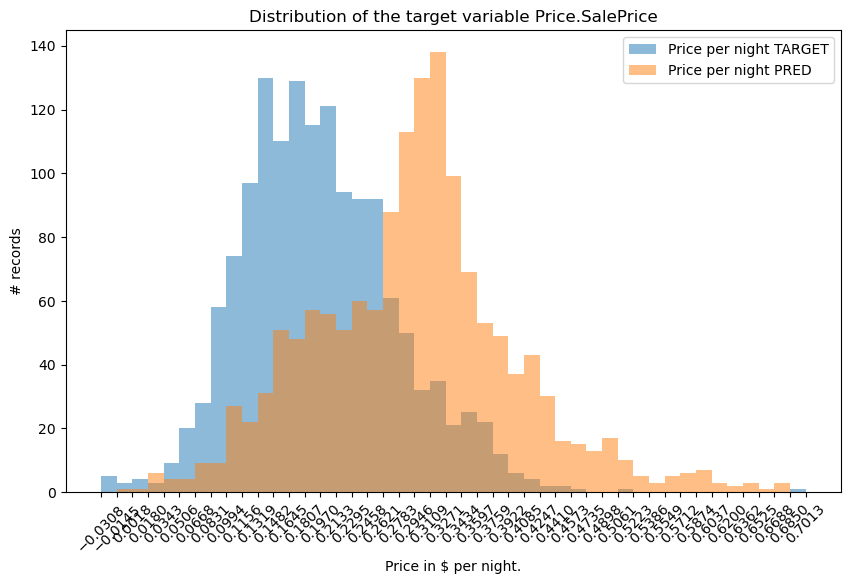

In [49]:
data0 = price
data1 = Y_test


fig, ax = plt.subplots(figsize = (10,6))

_,bins,_ = ax.hist(data0, label = 'Price per night TARGET', alpha = 0.5, bins = 45)
ax.hist(data1, label = 'Price per night PRED', alpha = 0.5, bins = bins)

ax.set_title('Distribution of the target variable Price.{name}'.format(name = data.name))
ax.set_xlabel('Price in $ per night.')
ax.set_ylabel('# records')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation = 45)
ax.legend()
plt.show()

# Таргет не нормализуют!!!!